# Ciência dos Dados - PROJETO 1

## Nicolas Barbosa Stegmann

  ## Análise da correlação entre renda e infraestrutura aos índices de insegurança alimentar no Brail

# Introdução

   A Insegurança Alimentar é brevemente definida como falta de disponibilidade e acesso de pessoas a alimentos. A partir desta definição, o projeto aqui desenvolvido entender como se da a dinâmica entre a insegurança alimentar, a renda, e a infraestrutura fornecida pelo governo. Dessa forma, a pergunta guia do projeto é: Os índices insegurança alimentar tem uma maior correlação com a renda per-capta ou com questões ligadas à infraestrutura da região?
   Para isso, foram utilizados a base de dados do PNAD domicílios tanto em 2009 e 2013, para que os dados obtidos fossem comparados e possibilitar a obtenção uma resposta mais sensível à pergunta que se propoem analisar.

# 1.0 Iniciando o Projeto: Definindo as varíaveis

### 1.1 Definindo as variáveis importantes para a análise

Primeiramente, foi necessário estabelecer quais domicílios apresentam habitantes que passam por Insegurança Alimentar, e por isso foi criada as variáveis a seguir:

•	Pessoas que assinalaram que passam por qualquer tipo de insegurança alimentar: Usada para levantar o pessoal nacional de pessoas que passam por insegurança alimentar no brasil.

•	Pessoas que assinalaram que não passam por qualquer tipo de insegurança alimentar: Usada para levantar o pessoal nacional de pessoas que passam por insegurança alimentar no brasil.

Com o intuito analisar a localização geográfica da Insegurança Alimentar no Brasil, julgou-se útil o uso de variáveis que agrupassem as pessoas que se consideram em situação de Insegurança Alimentar em suas posições geográficas, para que dessa maneira fosse mais fácil a posterior análise da influência da renda sobre estas pessoas.
   
•	Região: Os estados brasileiros foram agrupados em regiões, para que a análise do cenário de insegurança seja feita em relação as regiões, e não apenas em relação aos estados.

•	Domicílios em zona rural: Agrupamento de todos domicílios em as áreas rurais da PNAD, utilizada para entender a dinâmica da insegurança alimentar nas zonas do brasil

•	Domicílios em zona urbana: Agrupamento de todas as áreas urbanas da PNAD, mesmo objetivo da variável zona rural.

Foram então criadas variáveis que facilitem a compreensão da dinâmica da renda domiciliar per-capta no Brasil, e por tanto foram utilizadas as seguintes variãveis:

•	Renda domiciliar per capita: Razão entre a renda domiciliar e o número de habitantes do domicílio.

•   Faixa da Renda domiciliar per-capta: Renda do domicílio em relação ao salário mínimo

Por último, as variáveis utilizadas para compreender a dinâmica da infraestrutura fornecida pelo Estado em que o domicílio se encontra foram:

•  Forma de escoadouro do banheiro ou sanitário: usado para indicar o nível do saneamento básico

•  Destino do lixo domiciliar

• Iluminação do domicílio

Essas variáveis foram escolhidas pois julgou-se que eram fundamentais para definir o nível da infraestrutura da região.

### 1.2 Filtrando essas variáveis da base de dados da PNAD 2009

In [2]:
import pandas as pd
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
dados09 = pd.read_csv("DOM2009.csv",sep=",")

#Criando as variáveis

#Insegurança alimentar(2009)
dados09.loc[(dados09.V2103==1) | (dados09.V2105==1) | (dados09.V2107==1) | (dados09.V2109==1),'Insegurança_Alimentar'] = 'Sim'
dados09.loc[(dados09.V2103==3) & (dados09.V2105==3) & (dados09.V2107==3) & (dados09.V2109==3),'Insegurança_Alimentar'] = 'Não'

#Região(2009)
dados09.loc[(dados09.UF >= 10) & (dados09.UF < 20), "Região"] = "Norte"
dados09.loc[(dados09.UF >= 20) & (dados09.UF < 30), "Região"] = "Nordeste"
dados09.loc[(dados09.UF >= 30) & (dados09.UF < 40), "Região"] = "Sudeste"
dados09.loc[(dados09.UF >= 40) & (dados09.UF < 50), "Região"] = "Sul"
dados09.loc[(dados09.UF >= 50) & (dados09.UF < 60), "Região"] = "Centro-Oeste"

#Area do domicílio(2009)
dados09.loc[(dados09.V4105 <= 3), "Área_do_domicílio"] = "Urbana"
dados09.loc[(dados09.V4105 >= 4), "Área_do_domicílio"] = "Rural"

#Renda domiciliar percapta(2009) e excluindo os não aplicaveis
dados09.loc[(dados09.V4621 != 999999999999), "Renda"] = dados09.V4621

#Indicando que UF é variável categorica
dados09.UF = dados09.UF.astype("category")
dados09.UF.cat.categories=(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'])

#Indicando que faixa de renda é categorica e eliminando os não aplicáveis(2009)
dados09.V4622 = dados09.V4622.astype("category")
dados09.V4622.cat.categories  =(["Sem rendimento","Até ¼ salário mínimo","Mais de ¼ até ½ salário mínimo", "Mais de ½ até 1 salário mínimo", "Mais de 1 até  2 salários mínimos", "Mais de  2 até  3 salários mínimos", "Mais de 3 até 5 salários mínimos", "Mais de 5 salários mínimos", "Sem declaração"])
dados09.loc[(dados09.V4622 != 99), "Faixa_de_Renda"] = dados09.V4622

#Definindo as médias da renda per-capta de cada região(2009)
renda_norte09 = dados09[(dados09.Região == "Norte")].Renda.mean()
renda_nordeste09 = dados09[(dados09.Região == "Nordeste")].Renda.mean()
renda_centro_oeste09= dados09[(dados09.Região == "Centro-Oeste")].Renda.mean()
renda_sudeste09 = dados09[(dados09.Região == "Sudeste")].Renda.mean()
renda_sul09 = dados09[(dados09.Região == "Sul")].Renda.mean()

#Infraestrutura
dados09.loc[(dados09.V0219==1) & ((dados09.V0218==1) | (dados09.V0218==2)) & ((dados09.V0217==1) | (dados09.V0217==2)), 'Infraestrutura'] = 'Boa'
dados09.loc[(dados09.V0219!=1) | ((dados09.V0218!=1) & (dados09.V0218!=2)) | ((dados09.V0217!=1) & (dados09.V0217!=2)),'Infraestrutura'] = 'Ruim'

#dados09.loc[(dados09.V0219==1) & ((dados09.V0218==1) ) & ((dados09.V0217==1) ), 'Infraestrutura'] = 'Boa'
#dados09.loc[(dados09.V0219!=1) | (dados09.V0218!=1) | ((dados09.V0217!=1) ),'Infraestrutura'] = 'Ruim'


#Forma de escoadouro do banheiro ou sanitário (saneamento)
dados09.V0217 = dados09.V0217.astype('category')
dados09.V0217.cat.categories = ('RedeColetora', 'FossaSeptica1', 'FossaSeptica2', 'FossaRud', 'Vala','Água', 'Outro')

#Forma de coleta de lixo
dados09.V0218 = dados09.V0218.astype("category")
dados09.V0218.cat.categories = ("Coletado diretamente","Coletado indiretamente","Queimado ou enterrado na propriedade","Jogado em terreno baldio ou logradouro","Jogado em rio, lago ou mar","Outro destino")

#Forma de iluminação do domicílio
dados09.V0219 = dados09.V0219.astype("category")
dados09.V0219.cat.categories = ("Elétrica","Óleo, querosene ou gás de botijão", "outra forma")

#Criando um DataFrame com essas variáveis em 2009
colunas1 = dados09.loc[:,["UF", "Região", "Área_do_domicílio", "Insegurança_Alimentar","V0217", "V0218", "V0219", "Renda", "Faixa_de_Renda","Infraestrutura"]].dropna(subset=("UF","Região","Área_do_domicílio","Insegurança_Alimentar","Renda", "Faixa_de_Renda", "V0217", "V0218", "V0219", "Infraestrutura"))
colunas1.columns = ["Estado", "Região", "Área_do_domicílio", "Insegurança_Alimentar","Saneamento","Coleta_de_lixo", "Iluminação", "Renda", "Faixa_de_Renda", "Infraestrutura"]

colunas1.head(3)

,Estado,Região,Área_do_domicílio,Insegurança_Alimentar,Saneamento,Coleta_de_lixo,Iluminação,Renda,Faixa_de_Renda,Infraestrutura
3,Rondônia,Norte,Urbana,Não,FossaRud,Coletado diretamente,Elétrica,1053.0,Mais de 2 até 3 salários mínimos,Ruim
4,Rondônia,Norte,Urbana,Não,FossaRud,Coletado diretamente,Elétrica,930.0,Mais de 1 até 2 salários mínimos,Ruim
6,Rondônia,Norte,Urbana,Não,FossaRud,Coletado diretamente,Elétrica,232.0,Mais de ¼ até ½ salário mínimo,Ruim


### 1.3 Filtrando as variaveis da PNAD 2013

In [3]:
import pandas as pd
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
dados13 = pd.read_csv("DOM2013.csv",sep=",")

#Criando as variáveis

#Insegurança alimentar(2013)
dados13.loc[(dados13.V2103==1) | (dados13.V2105==1) | (dados13.V2107==1) | (dados13.V2109==1),'Insegurança_Alimentar'] = 'Sim'
dados13.loc[(dados13.V2103==3) & (dados13.V2105==3) & (dados13.V2107==3) & (dados13.V2109==3),'Insegurança_Alimentar'] = 'Não'

#Região(2013)
dados13.loc[(dados13.UF >= 10) & (dados13.UF < 20), "Região"] = "Norte"
dados13.loc[(dados13.UF >= 20) & (dados13.UF < 30), "Região"] = "Nordeste"
dados13.loc[(dados13.UF >= 30) & (dados13.UF < 40), "Região"] = "Sudeste"
dados13.loc[(dados13.UF >= 40) & (dados13.UF < 50), "Região"] = "Sul"
dados13.loc[(dados13.UF >= 50) & (dados13.UF < 60), "Região"] = "Centro-Oeste"

#Area do domicílio(2139)
dados13.loc[(dados13.V4105 <= 3), "Área_do_domicílio"] = "Urbana"
dados13.loc[(dados13.V4105 >= 4), "Área_do_domicílio"] = "Rural"

#Renda domiciliar percapta(2013) e excluindo os não aplicaveis
dados13.loc[(dados13.V4621 != 999999999999), "Renda"] = dados13.V4621

#Indicando que UF é variável categorica
dados13.UF = dados13.UF.astype("category")
dados13.UF.cat.categories=(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'])

#Indicando que faixa de renda é categorica e eliminando os não aplicáveis(2013)
dados13.V4622 = dados13.V4622.astype("category")
dados13.V4622.cat.categories  =(["Sem rendimento","Até ¼ salário mínimo","Mais de ¼ até ½ salário mínimo", "Mais de ½ até 1 salário mínimo", "Mais de 1 até  2 salários mínimos", "Mais de  2 até  3 salários mínimos", "Mais de 3 até 5 salários mínimos", "Mais de 5 salários mínimos", "Sem declaração"])
dados13.loc[(dados13.V4622 != 99), "Faixa_de_Renda"] = dados13.V4622

#Definindo as médias da renda per-capta de cada região(2013)
renda_norte13 = dados13[(dados13.Região == "Norte")].Renda.mean()
renda_nordeste13 = dados13[(dados13.Região == "Nordeste")].Renda.mean()
renda_centro_oeste13= dados13[(dados13.Região == "Centro-Oeste")].Renda.mean()
renda_sudeste13 = dados13[(dados13.Região == "Sudeste")].Renda.mean()
renda_sul13 = dados13[(dados13.Região == "Sul")].Renda.mean()

#Infraestrutura
dados13.loc[(dados13.V0219==1) & ((dados13.V0218==1) | (dados13.V0218==2)) & ((dados13.V0217==1) | (dados13.V0217==2)), 'Infraestrutura'] = 'Boa'
dados13.loc[(dados13.V0219!=1) | ((dados13.V0218!=1) & (dados13.V0218!=2)) | ((dados13.V0217!=1) & (dados13.V0217!=2)),'Infraestrutura'] = 'Ruim'

#dados09.loc[(dados09.V0219==1) & ((dados09.V0218==1) ) & ((dados09.V0217==1) ), 'Infraestrutura'] = 'Boa'
#dados09.loc[(dados09.V0219!=1) | (dados09.V0218!=1) | ((dados09.V0217!=1) ),'Infraestrutura'] = 'Ruim'


#Forma de escoadouro do banheiro ou sanitário (saneamento)
dados13.V0217 = dados13.V0217.astype('category')
dados13.V0217.cat.categories = ('RedeColetora', 'FossaSeptica1', 'FossaSeptica2', 'FossaRud', 'Vala','Água', 'Outro')

#Forma de coleta de lixo
dados13.V0218 = dados13.V0218.astype("category")
dados13.V0218.cat.categories = ("Coletado diretamente","Coletado indiretamente","Queimado ou enterrado na propriedade","Jogado em terreno baldio ou logradouro","Jogado em rio, lago ou mar","Outro destino")

#Forma de iluminação do domicílio
dados13.V0219 = dados13.V0219.astype("category")
dados13.V0219.cat.categories = ("Elétrica","Óleo, querosene ou gás de botijão", "outra forma")

#Criando um DataFrame com essas variáveis em 2013
colunas = dados13.loc[:,["UF", "Região", "Área_do_domicílio", "Insegurança_Alimentar","V0217", "V0218", "V0219", "Renda", "Faixa_de_Renda","Infraestrutura"]].dropna(subset=("UF","Região","Área_do_domicílio","Insegurança_Alimentar","Renda", "Faixa_de_Renda", "V0217", "V0218", "V0219", "Infraestrutura"))
colunas.columns = ["Estado", "Região", "Área_do_domicílio", "Insegurança_Alimentar","Saneamento","Coleta_de_lixo", "Iluminação", "Renda", "Faixa_de_Renda", "Infraestrutura"]

colunas.head(3)

,Estado,Região,Área_do_domicílio,Insegurança_Alimentar,Saneamento,Coleta_de_lixo,Iluminação,Renda,Faixa_de_Renda,Infraestrutura
2,Rondônia,Norte,Urbana,Não,FossaRud,Coletado diretamente,Elétrica,350.0,Mais de ½ até 1 salário mínimo,Ruim
3,Rondônia,Norte,Urbana,Não,FossaSeptica1,Coletado diretamente,Elétrica,339.0,Mais de ¼ até ½ salário mínimo,Boa
4,Rondônia,Norte,Urbana,Não,FossaSeptica1,Coletado diretamente,Elétrica,266.0,Mais de ¼ até ½ salário mínimo,Boa


# 2.0 Análise dos dados: Comparação estatísticas em 2009

### 2.1 Análise da relação entre insegurança alimentar e renda (2009)

Para iniciar a análise a respeito da influência da renda em relação aos índices de Insegurança alimentar, é necessário primeiramente confirmar se realmente há uma correlação entre essas varráveis. Por isso, o projeto foi iniciado com o seguinte gráfico:

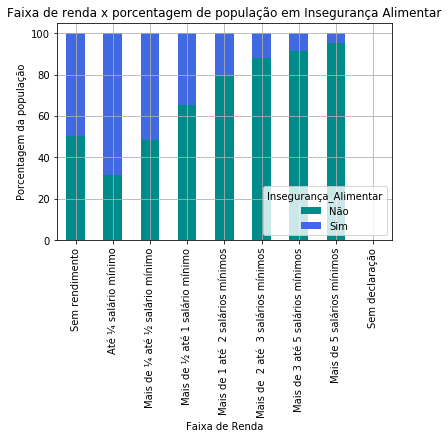

In [4]:
#Gráfico de crescimento de renda x diminuição da insegurança alimentar
a = (pd.crosstab((dados09.V4622),(colunas1.Insegurança_Alimentar), normalize = "index")*100).plot(kind="bar", stacked = True, title = "Faixa de renda x porcentagem de população em Insegurança Alimentar", color = ["darkcyan", "royalblue"])
a.set_xlabel("Faixa de Renda")
a.set_ylabel("Porcentagem da população")
plt.grid(True)

A partir do gráfico, é possivel concluir que a medida que a renda aumenta, a situação de Insegurança Alimentar diminui. Portanto, a correlação entre essas duas variáveis deve ser verdadeira.

Para aprofundar a análise da influência da renda nos índices de insegurança alimentar, entretanto, julgou-se necessário mapear a insegurança alimentar no Brasil, para que fosse possível comparar os índices de insegurança alimentar das regiões e a sua renda per-capta média.
Os gráficos abaixos expressam, respectivamente, as médias da renda per-capta das regiões e a porcentagem da população de cada região que estão em insegurança alimentar.

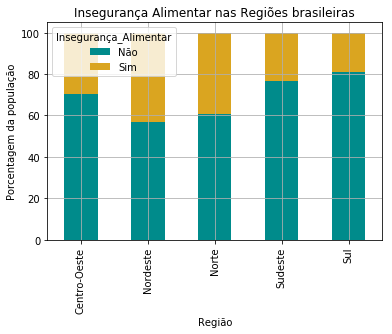

In [5]:
#Gráfico da localização da insegurança alimentar em cada região
tabela1 = (pd.crosstab((colunas1.Região),(colunas1.Insegurança_Alimentar), normalize="index")*100)
tabela1.plot(kind="bar", stacked =True, legend=True,title="Insegurança Alimentar nas Regiões brasileiras", color =["darkcyan", "goldenrod"]).set_ylabel("Porcentagem da população")
plt.grid(True)

A Insegurança alimentar está, portanto, distribuida da seguinte maneira:

* Norte: 40.9% da população está em insegurança alimentar
* Nordeste: 44.5% da população está em insegurança alimentar
* Centro-Oeste: 29.6% da população está em insegurança alimentar
* Sudeste: 23.7% da população está em insegurança alimentar
* Sul: 19.1% da população está em insegurança alimentar

Portanto, os estados que apresentam índices maiores de insegurança alimentar são os estados do Norte e do Nordeste. Abaixo, está o gráfico de renda per-capta média de cada região

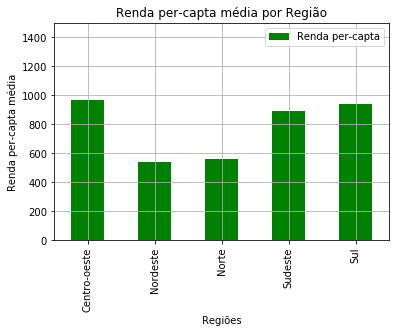

In [6]:
#Criando paramentros para um gráfico de renda média de cada região por região
médias = [renda_centro_oeste09, renda_nordeste09 ,renda_norte09, renda_sudeste09, renda_sul09]

#Criando um gráfico com os valores absolutos de renda per-capta mmédia de cada região
x = pd.DataFrame({"Renda per-capta": médias})
x = x.rename(index={0:"Centro-oeste", 1:"Nordeste", 2:"Norte",3:"Sudeste", 4:"Sul"})
x = x.plot(kind= "bar", color='green', title = "Renda per-capta média por Região")
x.set_xlabel("Regiões")
x.set_ylabel("Renda per-capta média")
plt.ylim(0,1500)
plt.grid(True)

A partir da comparação destes dois gráficos, é possível reparar que, como o esperado, conforme a renda per-capta da região decresce, o índice de insegurança alimentar tende a aumentar.
Nessa caso, a correlação entre os índices de insegurança alimentar e renda é então confirmada.

Para continuar o aprofundamento em relação a influência da renda nos índices de insegurança alimentar, foram análisadas a distribuição dos índices de insegurança alimentar em relação a sua posição dentro das regiões.


Os gráficos a seguir buscam esclarecer qual a porcentagem da população em zonas rurais e urbanas que estão em insegurança alimentar no Brasil, qual a porcentagem da população das zonas rurais e urbana de cada região em situação de insegurança alimentar e comparar a renda das populações rurais e urbana respectivamente, para que a partir da comparação entre eles se tenha um panorama em relação a influência da renda nas duas regiões.

Inicialmente, o gráfico da porcentagem da população rural e urbana em situação de insegurança alimentar foi utilizado para apresentar o panorama da população brasileira como um todo em relação a localização da insegurança alimentar. Tal gráfico está disposto abaixo.

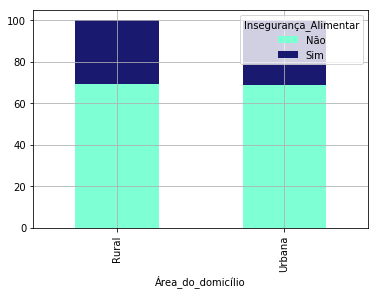

In [7]:
resumo = (pd.crosstab((colunas1.Área_do_domicílio), (colunas1.Insegurança_Alimentar), normalize = "index")*100)
resumo.plot(kind ="bar", stacked = True, color = ["aquamarine", "midnightblue"])
plt.grid(True)

O gráfico acima revela que, em geral, as zonas rurais e urbana apresentam índices relativos de insegurança alimentar muito próximos. Abaixo, está disposto um gráfico que apresenta individualmente a situação de cada região brasileira quanto a localização da insegurança alimentar

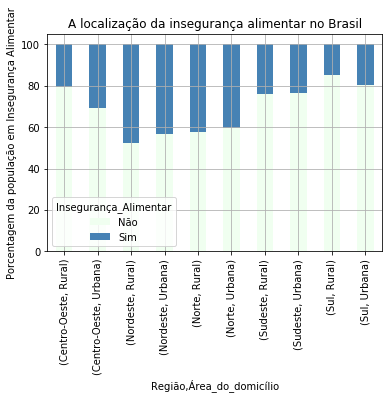

In [8]:
#relativização da análise por zona
tabela2 = (pd.crosstab([(dados09.Região),(dados09.Área_do_domicílio)], dados09.Insegurança_Alimentar, normalize="index")*100).plot(kind="bar", title = "A localização da insegurança alimentar no Brasil",stacked = True, color = ["honeydew", "steelblue"]).set_ylabel("Porcentagem da população em Insegurança Alimentar")
plt.grid(True)
tabela2

É possivel observar que na região Sul, Sudeste e e Centro-Oeste, a população em zona urbana apresenta maiores índices de insegurança alimentar. Enquanto nas regiçoes Norte e Nordeste este cenário aparece invertido.

Abaixo, está disposto o último gráfico para a análise da localização da insegurança alimentar com a renda per-capta do domicílio. Nele, está disposto a faixa de renda da população em relação a zona de seu domicílio.

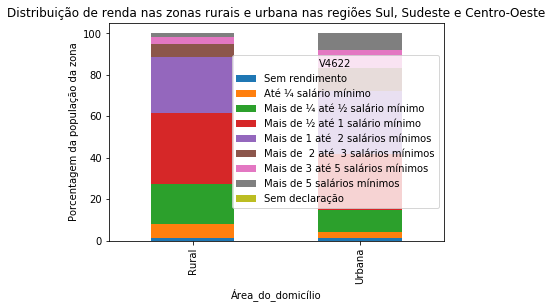

In [9]:
#renda nas zonas do centro-oeste, sul e sudeste
s = colunas1[(colunas1.Região == "Centro-Oeste") | (colunas1.Região == "Sul") | (colunas1.Região == "Sudeste")]
a = (pd.crosstab((s.Área_do_domicílio), dados09.V4622, normalize = "index")*100).plot(kind="bar", stacked = True, title = "Distribuição de renda nas zonas rurais e urbana nas regiões Sul, Sudeste e Centro-Oeste")
a.set_ylabel("Porcentagem da população da zona")
plt.show()

Este gráfico indica que, em geral, os domicílios na zona urbana dessas 3 regiões recebem uma renda superior a população em área rural.

Comparando os dados fornecidos por estes 3 gráficos, então, pôde-se perceber que, apesar de nas regiões Sul, Sudeste e Centro-Oeste a população urbana receber uma maior renda per-capta, a situação da insegurança alimentar nessas regiões é maior na zona urbana. Isso indica que, apesar da renda ter uma grande influência nos índices de insegurança alimentar, existem outros fatores relacionados a localização do domicílio que também devem gerar um impacto nestes índices.

### 2.2 Análise da relação entre Insegurança Alimentar e infraestrutura da região do domicílio (2009)

Para iniciar a análise entre a relação da insegurança alimentar com a infraestrutura da região, é necessário definir quais foram os parâmetros utilizados para definir o nível de infraestrutura da região. Um domicílio foi considerado em uma região com boa infraestrutura quando houvesse um bom índice de saneamento básico, de coleta de lixo e de iluminação do domicílio, ou seja, quando essas condições, que dependem do governo da região, forem respeitadas.

O gráfico abaixo apresenta um panorama geral em relação a porcentagem da população em insegurança alimentar que moram em domicílios com boa e ruim infraestrutura.

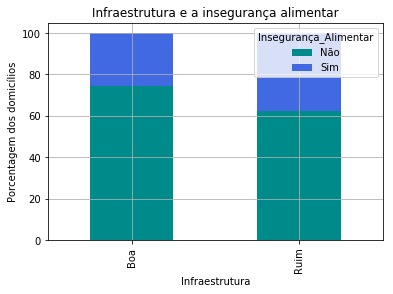

In [10]:
b = (pd.crosstab((colunas1.Infraestrutura),(colunas1.Insegurança_Alimentar), normalize = "index")*100).plot(kind="bar", stacked = True, title = "Infraestrutura e a insegurança alimentar", color = ["darkcyan", "royalblue"])
b.set_xlabel("Infraestrutura")
b.set_ylabel("Porcentagem dos domicílios")
plt.grid(True)

É possível notar que, em geral, domicílios situados em regiões com boa infraestrutura estão menos sujeitos a insegurança alimentar no Brasil

Assim como foi feito na análise da relação dos índices de insegurança alimentar com renda, o projeto também aprofundou relação da infraestrutura com estes índices. Para isso, o projeto utilizou-se da comparação dos gráficos de insegurança alimentar por região brasilera e de infraestrutura por região. Abaixo a análise se inicia com o gráfico de insegurança alimentar por região e zona.

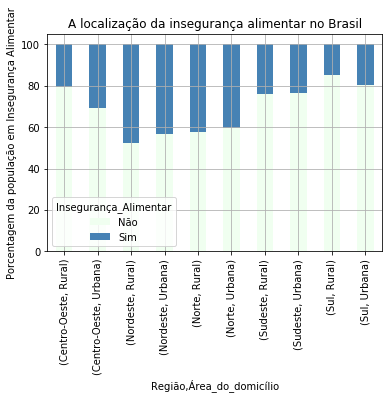

In [11]:
#relativização da análise por zona
tabela2 = (pd.crosstab([(dados09.Região),(dados09.Área_do_domicílio)], dados09.Insegurança_Alimentar, normalize="index")*100).plot(kind="bar", title = "A localização da insegurança alimentar no Brasil",stacked = True, color = ["honeydew", "steelblue"]).set_ylabel("Porcentagem da população em Insegurança Alimentar")
plt.grid(True)
tabela2

É possivel observar que na região Sul, Sudeste e e Centro-Oeste, a população em zona urbana apresenta maiores índices de insegurança alimentar. Enquanto nas regiões Norte e Nordeste este cenário aparece invertido.Também é importante reparar que as regiões que apresentam maior índice de insegurança alimentar são as regiões que apresentam maior área rural, conforme o gráfico a seguir aponta:

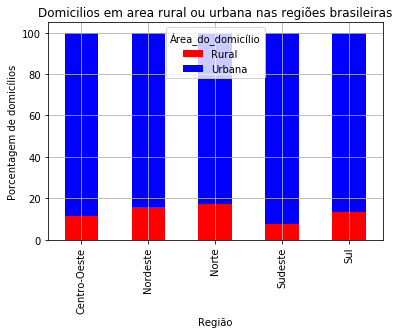

In [12]:
tabela1 = (pd.crosstab((colunas1.Região),(colunas1.Área_do_domicílio), normalize="index")*100)
tabela1.plot(kind="bar", stacked =True, legend=True,title="Domicilios em area rural ou urbana nas regiões brasileiras", color =["red", "blue"]).set_ylabel("Porcentagem de domicílios")
plt.grid(True)

Portanto, os estados que apresentam índices maiores de insegurança alimentar são os estados do Norte e do Nordeste. Abaixo, está o gráfico de infraestrutura por região, que foi plotado com o objetivo de servir como análise para o objetivo da seção

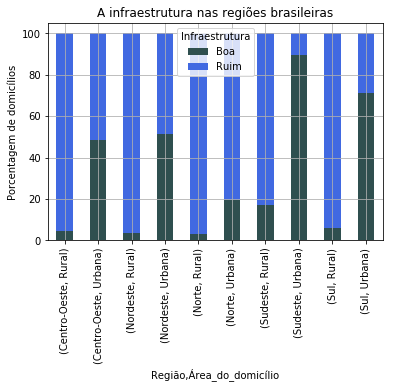

In [13]:
#Gráfico da infraestrutura de cada região
tabela1 = (pd.crosstab([(colunas1.Região),(colunas1.Área_do_domicílio)], (colunas1.Infraestrutura), normalize="index")*100)
tabela1.plot(kind="bar", stacked =True, legend=True,title="A infraestrutura nas regiões brasileiras", color =["darkslategray", "royalblue"]).set_ylabel("Porcentagem de domicílios")
plt.grid(True)


Acima, estão disponibilizados informações que serão comparadas posteriormente, nele, é possível reparar que a zona rural de todas as regiões apresentam infraestrutura pior do que as zonas urbanas. Abaixo, está disponibilizado um panorama geral do Brasil em relação a infraestrutura das zonas:

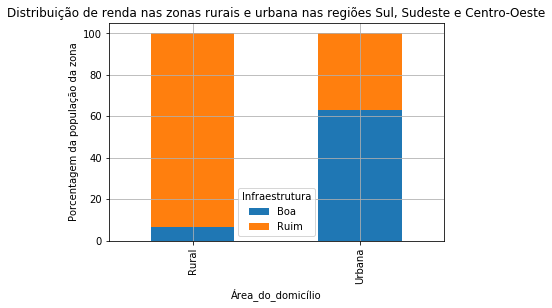

In [14]:
#renda nas zonas do centro-oeste, sul e sudeste
a = (pd.crosstab((colunas1.Área_do_domicílio), colunas1.Infraestrutura, normalize = "index")*100).plot(kind="bar", stacked = True, title = "Distribuição de renda nas zonas rurais e urbana nas regiões Sul, Sudeste e Centro-Oeste")
a.set_ylabel("Porcentagem da população da zona")
plt.grid(True)

A partir da comparação entre os gráficos acima, é possivel observar que, assim como acontece com a renda, com o melhoramento do índice de infraestrutura, a insegurança alimentar tende a cair.

# 3.0 Comparações estatísticas em 2013

### 3.1 Análise da relação entre insegurança alimentar e renda (2013)

A análise a respeito da influência da renda em relação aos índices de Insegurança alimentarem 2013 foi realizado de maneira similar a de 2009. Então, primeiramente foi confirmado se realmente há uma correlação entre essas variáveis. Aqui está o gráfico para 2013:

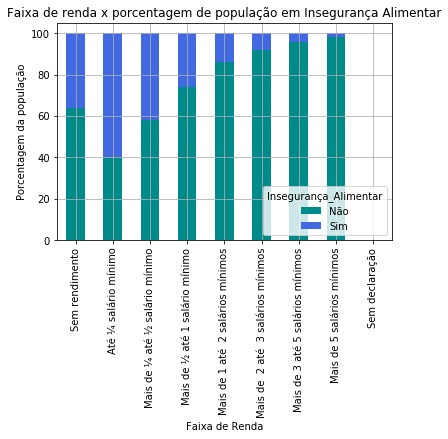

In [15]:
#Gráfico de crescimento de renda x diminuição da insegurança alimentar
q = (pd.crosstab((dados13.V4622),(colunas.Insegurança_Alimentar), normalize = "index")*100).plot(kind="bar", stacked = True, title = "Faixa de renda x porcentagem de população em Insegurança Alimentar", color = ["darkcyan", "royalblue"])
q.set_xlabel("Faixa de Renda")
q.set_ylabel("Porcentagem da população")
plt.grid(True)

A partir do gráfico, é possivel concluir que a medida que a renda aumenta, a situação de Insegurança Alimentar diminui. Portanto, a correlação entre essas duas variáveis também deve ser verdadeira em 2013.

De maneira similar a PNAD 2009, julgou-se necessário mapear a insegurança alimentar no Brasil, para que fosse possível comparar os índices de insegurança alimentar das regiões e a sua renda per-capta média.
Os gráficos abaixos expressam, respectivamente, as médias da renda per-capta das regiões e a porcentagem da população de cada região em 2009 e 2013 que estão em insegurança alimentar.

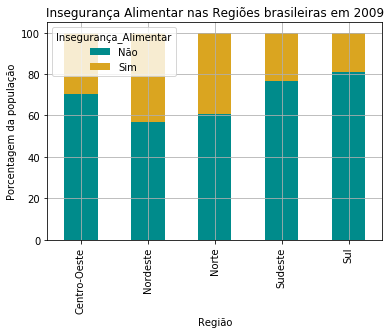

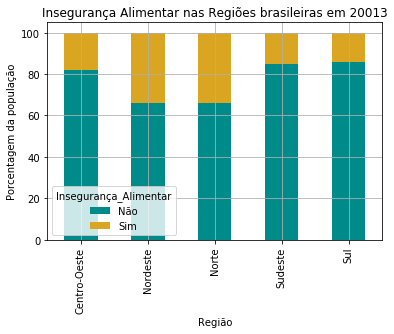

In [16]:
#Gráfico da localização da insegurança alimentar em cada região em 2009
tabela1 = (pd.crosstab((colunas1.Região),(colunas1.Insegurança_Alimentar), normalize="index")*100)
tabela1.plot(kind="bar", stacked =True, legend=True,title="Insegurança Alimentar nas Regiões brasileiras em 2009", color =["darkcyan", "goldenrod"]).set_ylabel("Porcentagem da população")
plt.grid(True)

#Gráfico da localização da insegurança alimentar em cada região 2013
tabela = (pd.crosstab((colunas.Região),(colunas.Insegurança_Alimentar), normalize="index")*100)
tabela.plot(kind="bar", stacked =True, legend=True,title="Insegurança Alimentar nas Regiões brasileiras em 20013", color =["darkcyan", "goldenrod"]).set_ylabel("Porcentagem da população")
plt.grid(True)

A partir do gráfico, é possivel ver que os índices de insegurança alimentar caíram em todos os estados quando comparados a 2009. Além disso os estados que apresentam índices maiores de insegurança alimentar em 2013 são os mesmos de 2009, ou seja, os estados do Norte e do Nordeste. Abaixo, está o gráfico de renda per-capta média de cada região em 2013:

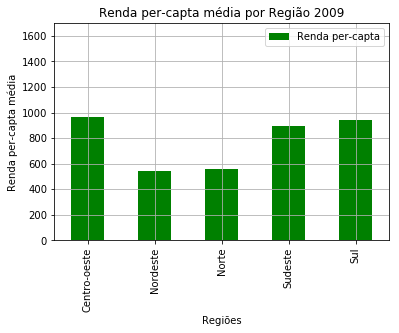

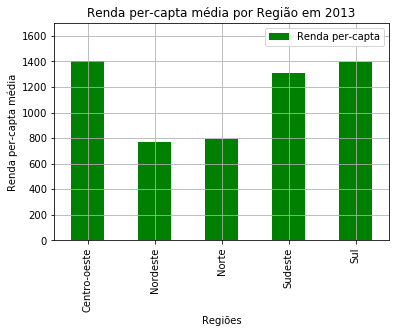

In [17]:
#Criando paramentros para um gráfico de renda média de cada região por região
médias = [renda_centro_oeste09, renda_nordeste09 ,renda_norte09, renda_sudeste09, renda_sul09]

#Criando um gráfico com os valores absolutos de renda per-capta mmédia de cada região
x = pd.DataFrame({"Renda per-capta": médias})
x = x.rename(index={0:"Centro-oeste", 1:"Nordeste", 2:"Norte",3:"Sudeste", 4:"Sul"})
x = x.plot(kind= "bar", color='green', title = "Renda per-capta média por Região 2009")
x.set_xlabel("Regiões")
x.set_ylabel("Renda per-capta média")
plt.ylim(0,1700)
plt.grid(True)


#Criando paramentros para um gráfico de renda média de cada região por região
médias1 = [renda_centro_oeste13, renda_nordeste13 ,renda_norte13, renda_sudeste13, renda_sul13]

#Criando um gráfico com os valores absolutos de renda per-capta mmédia de cada região
w = pd.DataFrame({"Renda per-capta": médias1})
w = w.rename(index={0:"Centro-oeste", 1:"Nordeste", 2:"Norte",3:"Sudeste", 4:"Sul"})
w = w.plot(kind= "bar", color='green', title = "Renda per-capta média por Região em 2013")
w.set_xlabel("Regiões")
w.set_ylabel("Renda per-capta média")
plt.ylim(0,1700)
plt.grid(True)

A comparação destes dois gráficos, além de confirmar a correlação entre insegurança alimentar e renda (assim como em 2009), nos aponta que a diminuição dos índices de insegurança alimentar em 2013 pode estar correlacionada com o aumento da renda per-capta de todas as regiões.

### 3.2 Análise da relação entre Insegurança Alimentar e infraestrutura da região do domicílio (2013)

Os parâmetros utilizados para correlacionar insegurança alimentar e a infraestrutura da região foram os mesmo utilizados para 2009.

O gráfico abaixo apresenta um panorama geral em relação a porcentagem da população em insegurança alimentar que moram em domicílios com boa e ruim infraestrutura.

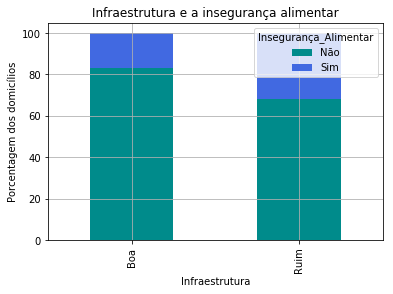

In [18]:
c = (pd.crosstab((colunas.Infraestrutura),(colunas.Insegurança_Alimentar), normalize = "index")*100).plot(kind="bar", stacked = True, title = "Infraestrutura e a insegurança alimentar", color = ["darkcyan", "royalblue"])
c.set_xlabel("Infraestrutura")
c.set_ylabel("Porcentagem dos domicílios")
plt.grid(True)

É possível notar que a correlação entre uma boa infraestrutura e a segurança alimentarse mantém em 2013.

Para analisar se a variação da infraestrutura entre 2009 e 2013 se correlacionou com a diminuição do índice de insegurança alimentar, estão abaixo os seguintes gráficos

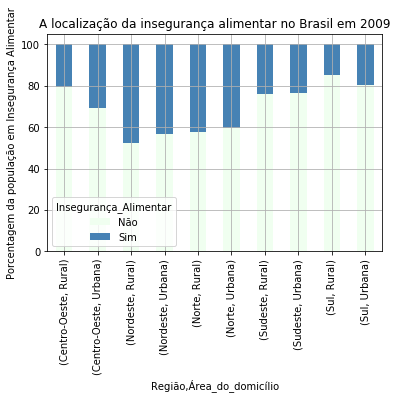

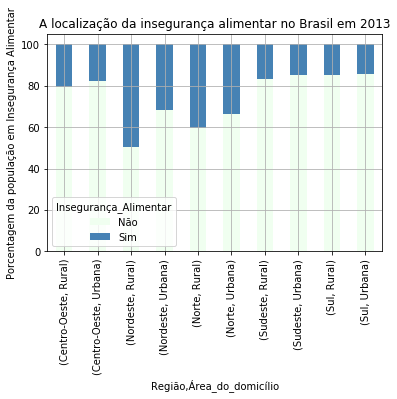

In [19]:
#relativização da análise por zona
tabela2 = (pd.crosstab([(dados09.Região),(dados09.Área_do_domicílio)], dados09.Insegurança_Alimentar, normalize="index")*100).plot(kind="bar", title = "A localização da insegurança alimentar no Brasil em 2009",stacked = True, color = ["honeydew", "steelblue"]).set_ylabel("Porcentagem da população em Insegurança Alimentar")
plt.grid(True)
tabela2

#relativização da análise por zona
tabela2 = (pd.crosstab([(dados13.Região),(dados13.Área_do_domicílio)], dados13.Insegurança_Alimentar, normalize="index")*100).plot(kind="bar", title = "A localização da insegurança alimentar no Brasil em 2013",stacked = True, color = ["honeydew", "steelblue"]).set_ylabel("Porcentagem da população em Insegurança Alimentar")
plt.grid(True)
tabela2

A partir do gráfico, é possivel ver que os índices de insegurança alimentar caíram em todos os estados quando comparados a 2009. Além disso os estados que apresentam índices maiores de insegurança alimentar em 2013 são os mesmos de 2009, ou seja, os estados do Norte e do Nordeste. Abaixo, está a comparação entre a infraestrutura das regiões em 2009 e em 2013

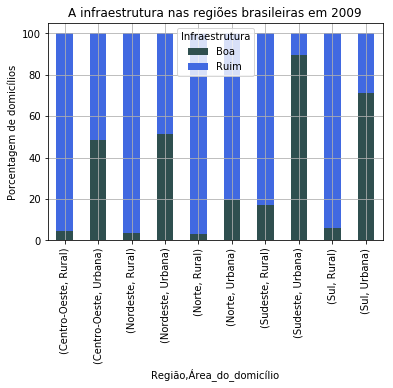

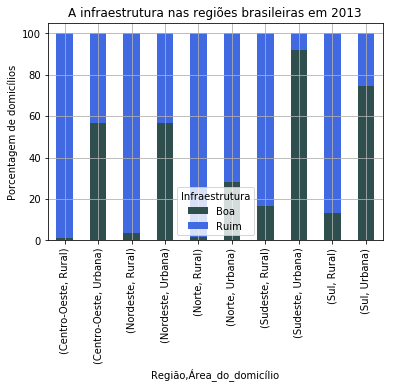

In [20]:
#Gráfico da infraestrutura de cada região
tabela1 = (pd.crosstab([(colunas1.Região),(colunas1.Área_do_domicílio)], (colunas1.Infraestrutura), normalize="index")*100)
tabela1.plot(kind="bar", stacked =True, legend=True,title="A infraestrutura nas regiões brasileiras em 2009", color =["darkslategray", "royalblue"]).set_ylabel("Porcentagem de domicílios")
plt.grid(True)


#Gráfico da infraestrutura de cada região
tabela13 = (pd.crosstab([(colunas.Região),(colunas.Área_do_domicílio)], (colunas.Infraestrutura), normalize="index")*100)
tabela13.plot(kind="bar", stacked =True, legend=True,title="A infraestrutura nas regiões brasileiras em 2013", color =["darkslategray", "royalblue"]).set_ylabel("Porcentagem de domicílios")
plt.grid(True)

A partir desta comparação, é possivel que a melhoria na infraestrutura das regiões acompanhou a melhoria na insegurança alimentar das localizações analisadas.

# 4.0 Comparação entre as correlações

O método aplicado para comparar as correlações da renda e da infraestrutura e a insegurança alimentar foi a análise de situações específicas que sirvam de exemplo para expressar a maior correlação de uma variável em relação a outra.

### 4.1 O caso da região Sul

A região Sul apresenta maior número de domicílios em zona rural do que o nordeste, conforme o gráfico "Domicílios em zonas rurais e urbanas nas regiões brasileiras", plotado abaixo:

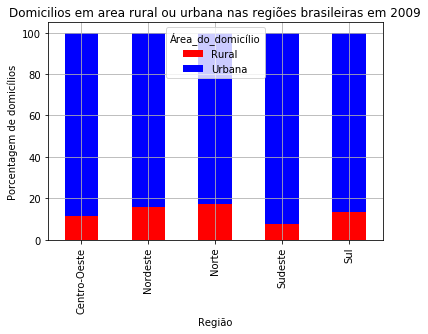

In [21]:
tabela1 = (pd.crosstab((colunas1.Região),(colunas1.Área_do_domicílio), normalize="index")*100)
tabela1.plot(kind="bar", stacked =True, legend=True,title="Domicilios em area rural ou urbana nas regiões brasileiras em 2009", color =["red", "blue"]).set_ylabel("Porcentagem de domicílios")
plt.grid(True)

Segundo o gráfico abaixo, a zona rural no sul apresenta uma infraestrutura aproximadamente igual a da região nordeste:

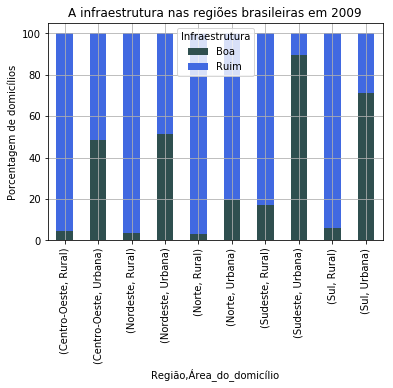

In [22]:
#Gráfico da infraestrutura de cada região
tabela1 = (pd.crosstab([(colunas1.Região),(colunas1.Área_do_domicílio)], (colunas1.Infraestrutura), normalize="index")*100)
tabela1.plot(kind="bar", stacked =True, legend=True,title="A infraestrutura nas regiões brasileiras em 2009", color =["darkslategray", "royalblue"]).set_ylabel("Porcentagem de domicílios")
plt.grid(True)

Seguindo a linha de pensamento, já que ambas as regiões possuem aproximadamente a mesma taxa de domicílios em zonas rurais, e ao mesmo tempo as zonas rurais destes estados apresentam aproximadamento o mesmo índice de infraestrutura, era esperado que as regiões apresentassem índices de insegurança alimentar parecidos. Entretanto, não é isso que ocorre, como indicado no gráfico abaixo:

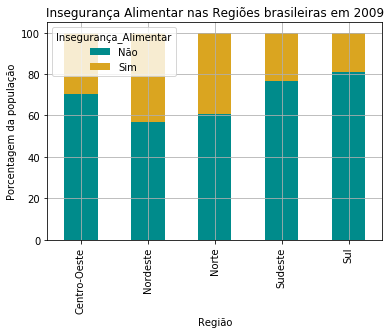

In [23]:
#Gráfico da localização da insegurança alimentar em cada região
tabela1 = (pd.crosstab((colunas1.Região),(colunas1.Insegurança_Alimentar), normalize="index")*100)
tabela1.plot(kind="bar", stacked =True, legend=True,title="Insegurança Alimentar nas Regiões brasileiras em 2009", color =["darkcyan", "goldenrod"]).set_ylabel("Porcentagem da população")
plt.grid(True)

Entretanto, se a renda for comparada, a correlação é mais nítida. A renda média da região sul é superior a renda da região nordeste (conforme o gráfico abaixo), e como esperado, a insegurança alimentar é menor.

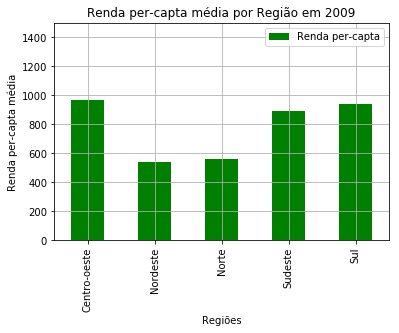

In [24]:
#Criando paramentros para um gráfico de renda média de cada região por região
médias = [renda_centro_oeste09, renda_nordeste09 ,renda_norte09, renda_sudeste09, renda_sul09]

#Criando um gráfico com os valores absolutos de renda per-capta mmédia de cada região
x = pd.DataFrame({"Renda per-capta": médias})
x = x.rename(index={0:"Centro-oeste", 1:"Nordeste", 2:"Norte",3:"Sudeste", 4:"Sul"})
x = x.plot(kind= "bar", color='green', title = "Renda per-capta média por Região em 2009")
x.set_xlabel("Regiões")
x.set_ylabel("Renda per-capta média")
plt.ylim(0,1500)
plt.grid(True)

# 5.0 Conclusão e considerações finais

A partir da extensa analise dos dados levantados nesse projeto, conclui-se que, apesar de haver uma correlação tanto entre a infraestrutura da região como a renda em relação aos Indices de segurança alimentar, a renda per-capta da região está mais fortemente correlacionada com os índices de insegurança alimentar.

É necessário lembrar que o projeto aqui desenvolvido foi baseado em um modelo, que como qualquer outro, possui suas limitações. Um exemplo de limitação do modelo utilizado foi considerar apenas as médias das rendas per-captas nas análises das rendas das regiões e zonas. Nesse caso, é possivel que variação da distribuição de renda, ou seja, a desigualdade da distribuição de renda, tenha alguma influência na análise realizada. Tal limitação pode ser mais facilmente compreendida através do gráfico a seguir:

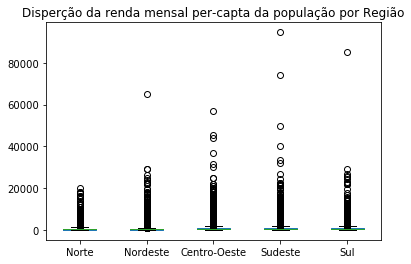

In [25]:
a10=pd.DataFrame([colunas1[colunas1.Região=="Norte"].Renda, colunas1[colunas1.Região=="Nordeste"].Renda, colunas1[colunas1.Região=="Centro-Oeste"].Renda, colunas1[colunas1.Região=="Sudeste"].Renda, colunas1[colunas1.Região=="Sul"].Renda],index=('Norte','Nordeste','Centro-Oeste','Sudeste','Sul'))
a10=a10.T
a10.plot.box()
plt.title("Disperção da renda mensal per-capta da população por Região")

Analisando o gráfico, é possível perceber que existem rendas que fogem exessivamente da média, e portanto com certeza geram distorções na média.